# Walmart Sales Analysis and Optimization

## 🗂️ Project Overview
The company holds valuable retail sales data that includes transaction details such as branch location, product type, customer type, payment method, and purchase time. This data serves as an essential asset to understand customer behavior, operational efficiency, and opportunities for revenue growth. Stakeholders aim to analyze how these factors influence business performance and identify strategies to optimize sales.



## 🎯 Objectives
- Analyze sales patterns: Identify sales trends based on products, branches, customer types, and payment methods.
- Evaluate branch performance: Compare the performance of each branch to determine the top-performing and underperforming branches.
- Analyze customer satisfaction: Use customer ratings to assess their experience and identify factors influencing satisfaction.
- Provide strategic insights: Deliver data-driven recommendations to boost sales and operational efficiency.


## 📊 Data Description
### An interactive dashboard in Power BI showing:
- Total sales per branch and product category.
- Monthly sales trends over time.
- Payment method analysis.

### Distribution of customer ratings.
- An analytical report in Google Colab using Python, including:
- Descriptive statistics of the data.
- Visualizations of sales trends.
- Correlation analysis between variables (e.g., ratings and gross income).
- Key insights and actionable recommendations.

## 🌟 Success Criteria
- The dashboard is easy for stakeholders to understand.
- The Python analysis provides actionable insights.
- Strategic recommendations are data-driven and aligned with business objectives.


# Business Insight Overview

# Recommendations & Next Steps

# Data Wrangling

In [1]:
from google.colab import drive
drive.mount('/content/drive')

!ls "/content/drive/My Drive"

Mounted at /content/drive
'Bangkit 2024'			  'Colab Notebooks'		    'Learn Finance Track'
 BI				   data				    'Machine Learning'
'Business Analytics Himabis.pdf'  'Dicoding for financial analyst'   Prototype
 Classroom			   Document			     Sopyan_KRS.pdf


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import missingno as msno
from textwrap import wrap

In [3]:
file_path = "/content/drive/MyDrive/Document/Analysis Data/Dataset/Project4/walmart_sales.xlsx"
df = pd.read_excel(file_path)
df.shape

(1000, 11)

In [4]:
df.head()

,Date,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Payment,cogs,Rating
0,2019-01-01,B,Mandalay,Member,Female,Food and beverages,84.63,10,Credit card,846.30,9.0
1,2019-01-01,C,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,Cash,126.44,8.5
2,2019-01-01,B,Mandalay,Normal,Female,Electronic accessories,74.71,6,Cash,448.26,6.7
3,2019-01-01,C,Naypyitaw,Member,Female,Sports and travel,36.98,10,Credit card,369.80,7.0
4,2019-01-01,A,Yangon,Member,Female,Sports and travel,27.04,4,Ewallet,108.16,6.9


# Assesing the Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1000 non-null   datetime64[ns]
 1   Branch         1000 non-null   object        
 2   City           1000 non-null   object        
 3   Customer type  1000 non-null   object        
 4   Gender         1000 non-null   object        
 5   Product line   1000 non-null   object        
 6   Unit price     1000 non-null   float64       
 7   Quantity       1000 non-null   int64         
 8   Payment        1000 non-null   object        
 9   cogs           1000 non-null   float64       
 10  Rating         1000 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 86.1+ KB


<Axes: >

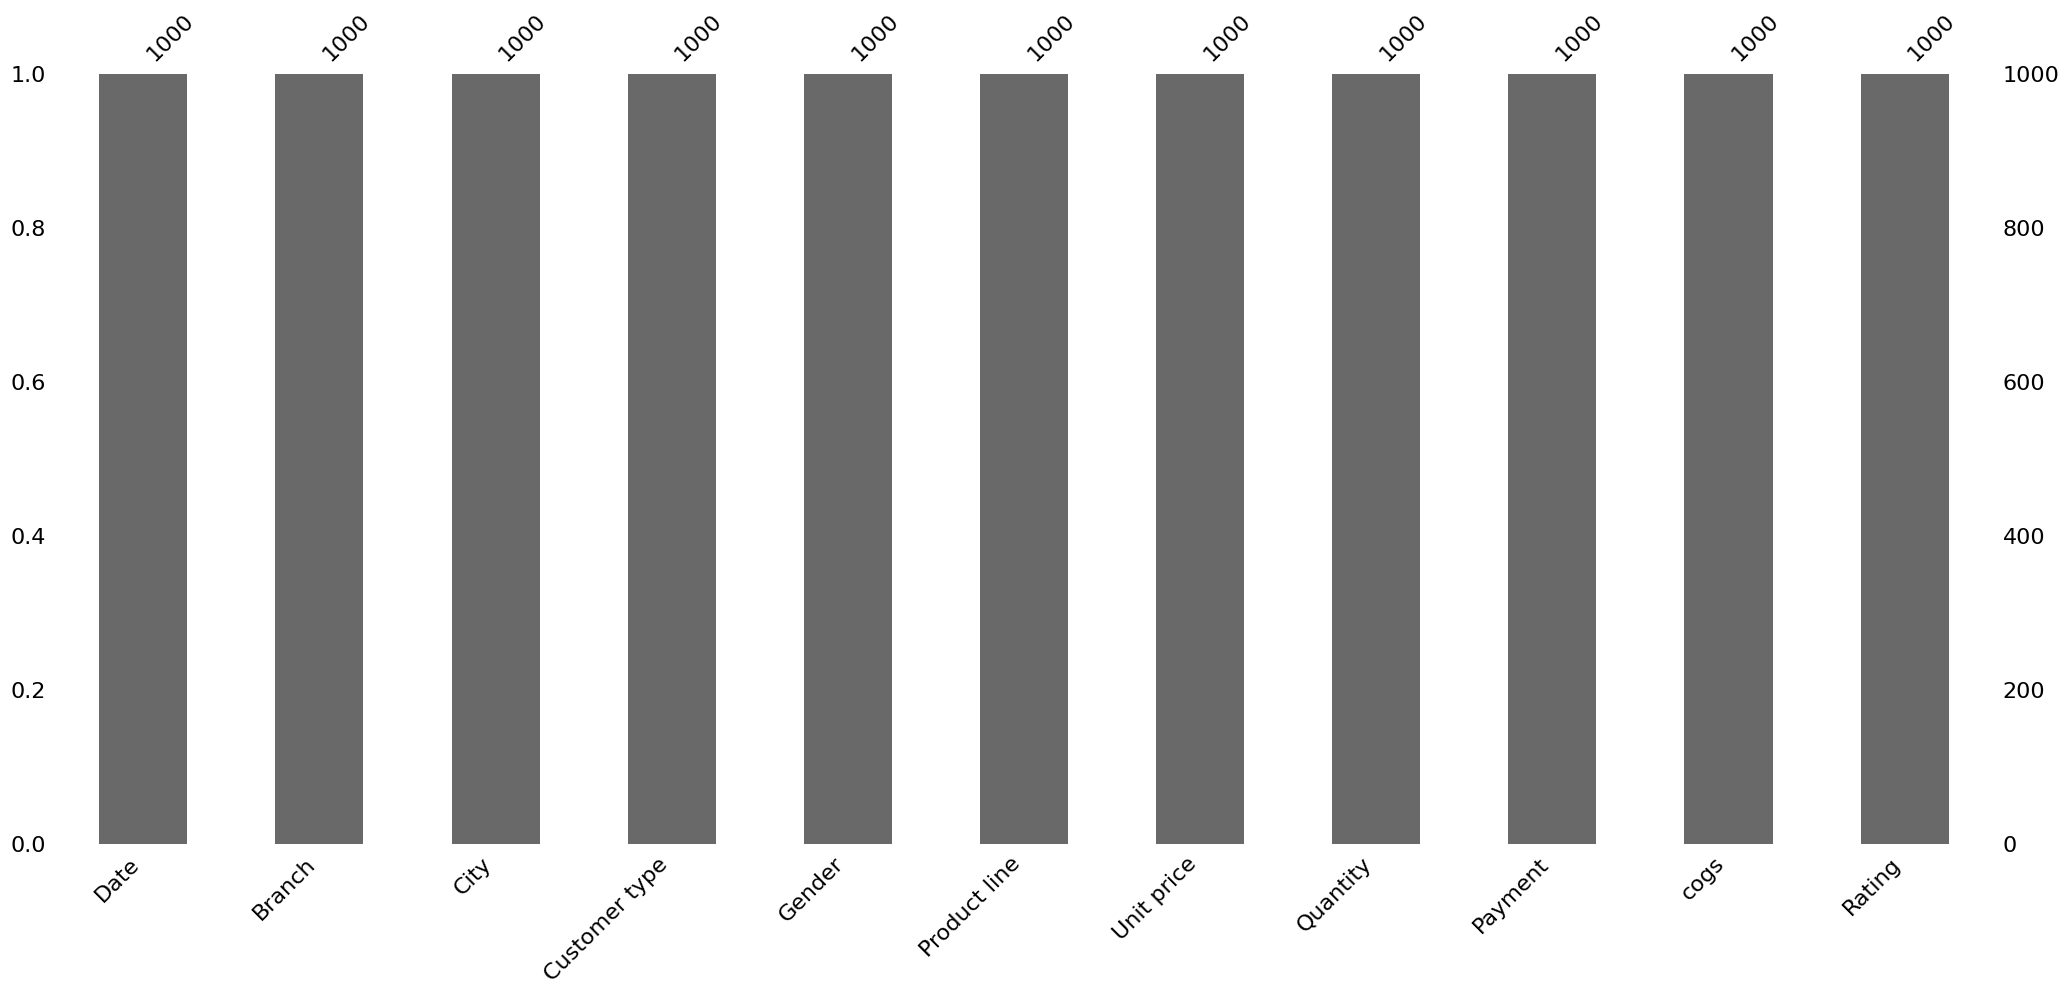

In [6]:
msno.bar(df)

In [7]:
pd.isnull(df).sum()

,0
Date,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Payment,0
cogs,0


In [8]:
df.describe()

,Date,Unit price,Quantity,cogs,Rating
count,1000,1000.000000,1000.000000,1000.00000,1000.00000
mean,2019-02-14 00:05:45.600000,55.672130,5.510000,307.58738,6.97270
min,2019-01-01 00:00:00,10.080000,1.000000,10.17000,4.00000
25%,2019-01-24 00:00:00,32.875000,3.000000,118.49750,5.50000
50%,2019-02-13 00:00:00,55.230000,5.000000,241.76000,7.00000
75%,2019-03-08 00:00:00,77.935000,8.000000,448.90500,8.50000
max,2019-03-30 00:00:00,99.960000,10.000000,993.00000,10.00000
std,NaN,26.494628,2.923431,234.17651,1.71858


In [9]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Exploratory Data Analysis

In [18]:
df["Tax 5%"] = df["cogs"] * 0.05
df["Net Revenue"] = df["cogs"] + df["Tax 5%"]
df["Profit"] = df["Net Revenue"] - df["cogs"]
df["GPM %"] = (df["Profit"] / df["Net Revenue"]) * 100

In [19]:
df["Tax 5%"] = df["Tax 5%"].round(2)
df["Net Revenue"] = df["Net Revenue"].round(2)
df["Profit"] = df["Profit"].round(2)
df["GPM %"] = df["GPM %"].round(2)

In [20]:
df.head()

,Date,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Payment,cogs,...,994,995,996,997,998,999,Tax 5%,Net Revenue,Profit,GPM %
0,2019-01-01,B,Mandalay,Member,Female,Food and beverages,84.63,10.0,Credit card,846.30,...,NaN,NaN,NaN,NaN,NaN,NaN,42.32,888.62,42.32,4.76
1,2019-01-01,C,Naypyitaw,Normal,Female,Electronic accessories,63.22,2.0,Cash,126.44,...,NaN,NaN,NaN,NaN,NaN,NaN,6.32,132.76,6.32,4.76
2,2019-01-01,B,Mandalay,Normal,Female,Electronic accessories,74.71,6.0,Cash,448.26,...,NaN,NaN,NaN,NaN,NaN,NaN,22.41,470.67,22.41,4.76
3,2019-01-01,C,Naypyitaw,Member,Female,Sports and travel,36.98,10.0,Credit card,369.80,...,NaN,NaN,NaN,NaN,NaN,NaN,18.49,388.29,18.49,4.76
4,2019-01-01,A,Yangon,Member,Female,Sports and travel,27.04,4.0,Ewallet,108.16,...,NaN,NaN,NaN,NaN,NaN,NaN,5.41,113.57,5.41,4.76


In [23]:
# Grouping data by Product line
summary = df.groupby("Product line").agg({
    "Tax 5%": "sum",
    "Net Revenue": "sum",
    "Profit": "sum",
    "GPM %": "mean"
}).reset_index()

# Adding a total row
summary.loc["Total"] = summary.sum(numeric_only=True)
summary.loc["Total", "Product line"] = "Total"

# Rounding numbers for display
summary["Tax 5%"] = summary["Tax 5%"].round(2)
summary["Net Revenue"] = summary["Net Revenue"].round(2)
summary["Profit"] = summary["Profit"].round(2)
summary["GPM %"] = summary["GPM %"].round(2)

# Sorting the summary by Net Revenue in descending order
summary = summary.sort_values(by="Net Revenue", ascending=False, ignore_index=True)

# Displaying the summary
print(summary)


             Product line    Tax 5%  Net Revenue    Profit  GPM %
0                   Total  15379.67    322966.84  15379.49  28.56
1      Food and beverages   2673.63     56144.87   2673.61   4.76
2       Sports and travel   2625.00     55122.89   2624.96   4.76
3  Electronic accessories   2587.56     54337.54   2587.53   4.76
4     Fashion accessories   2586.01     54305.86   2585.98   4.76
5      Home and lifestyle   2564.82     53861.87   2564.81   4.76
6       Health and beauty   2342.65     49193.81   2342.60   4.76


## Analyze sales patterns: Identify sales trends based on products, branches, customer types, and payment methods.

In [25]:
# Sales trends by product line
product_sales = df.groupby("Product line")["Net Revenue"].sum().sort_values(ascending=False)
print(product_sales)


Product line
Food and beverages        56144.87
Sports and travel         55122.89
Electronic accessories    54337.54
Fashion accessories       54305.86
Home and lifestyle        53861.87
Health and beauty         49193.81
Name: Net Revenue, dtype: float64


In [32]:
# Sales trends by branch
branch_sales = df.groupby("Branch")["Net Revenue"].sum().sort_values(ascending=False)
print(branch_sales)

Branch
C    110568.72
A    106200.34
B    106197.78
Name: Net Revenue, dtype: float64


In [33]:
# Sales trends by customer type
customer_sales = df.groupby("Customer type")["Net Revenue"].sum().sort_values(ascending=False)
print(customer_sales)

Customer type
Member    164223.51
Normal    158743.33
Name: Net Revenue, dtype: float64


In [34]:
# Sales trends by payment method
payment_sales = df.groupby("Payment")["Net Revenue"].sum().sort_values(ascending=False)
print(payment_sales)

Payment
Cash           112206.57
Ewallet        109993.17
Credit card    100767.10
Name: Net Revenue, dtype: float64


In [37]:
# Extract month from the date
df['Month'] = pd.to_datetime(df['Date']).dt.month

# Total sales per month
monthly_sales = df.groupby('Month')['Net Revenue'].sum()

print(monthly_sales)

Month
1.0    116291.91
2.0     97219.38
3.0    109455.55
Name: Net Revenue, dtype: float64


In [38]:
df.groupby('Gender')['Customer type'].value_counts()

Gender  Customer type
Female  Member           261
        Normal           240
Male    Normal           259
        Member           240
Name: count, dtype: int64

In [41]:
city_analysis = df.groupby('City').agg(
    Total_Sales=('Net Revenue', 'sum'),
).sort_values(by='Total_Sales', ascending=False)

print(city_analysis)

           Total_Sales
City                  
Naypyitaw    110568.72
Yangon       106200.34
Mandalay     106197.78


## Evaluate branch performance: Compare the performance of each branch to determine the top-performing and underperforming branches.

In [ ]:
# Total sales per branch
branch_sales = df.groupby('Branch')['Total'].sum().sort_values(ascending=False)

# Average gross income per branch
branch_income = df.groupby('Branch')['gross income'].mean().sort_values(ascending=False)

# Combine results into a DataFrame for better analysis
branch_performance = pd.DataFrame({
    'Total Sales': branch_sales,
    'Avg Gross Income': branch_income
}).sort_values(by='Total Sales', ascending=False)

print(branch_performance)

        Total Sales  Avg Gross Income
Branch                               
C       110568.7065         16.052367
A       106200.3705         14.874001
B       106197.6720         15.232024


## Analyze customer satisfaction: Use customer ratings to assess their experience and identify factors influencing satisfaction.

In [42]:
# Average rating per branch
branch_ratings = df.groupby('Branch')['Rating'].mean().sort_values(ascending=False)

print(branch_ratings)


Branch
C    7.072866
A    7.027059
B    6.818072
Name: Rating, dtype: float64


In [45]:
# Correlation between Rating and other numerical variables
correlation_matrix = df[['Rating', 'Net Revenue', 'GPM %']].corr()
print(correlation_matrix)

               Rating  Net Revenue  GPM %
Rating       1.000000    -0.036442    NaN
Net Revenue -0.036442     1.000000    NaN
GPM %             NaN          NaN    NaN


In [46]:
# Average rating per product line
product_ratings = df.groupby('Product line')['Rating'].mean().sort_values(ascending=False)

print(product_ratings)

Product line
Food and beverages        7.113218
Fashion accessories       7.029213
Health and beauty         7.003289
Electronic accessories    6.924706
Sports and travel         6.916265
Home and lifestyle        6.837500
Name: Rating, dtype: float64


# Visualization & Explanatory Analysis

### Sales patern

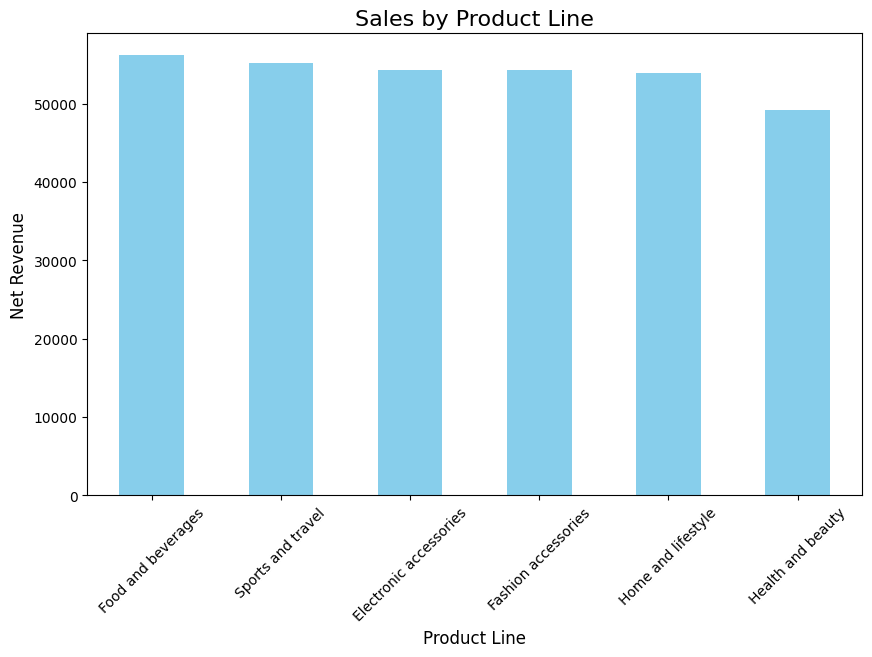

In [31]:
# Total sales by product line
plt.figure(figsize=(10, 6))
product_sales.plot(kind="bar", color="skyblue")
plt.title("Sales by Product Line", fontsize=16)
plt.xlabel("Product Line", fontsize=12)
plt.ylabel("Net Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.show()

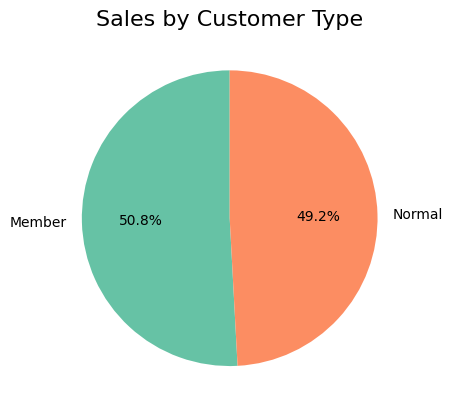

In [50]:
customer_sales.plot(kind="pie", autopct='%1.1f%%', startangle=90, colors=["#66c2a5", "#fc8d62"])
plt.title("Sales by Customer Type", fontsize=16)
plt.ylabel("")
plt.show()

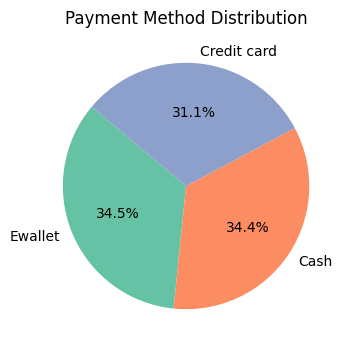

In [ ]:
# Payment method distribution
payment_distribution = df['Payment'].value_counts()
plt.figure(figsize=(6, 4))
payment_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()

### Branch Performance

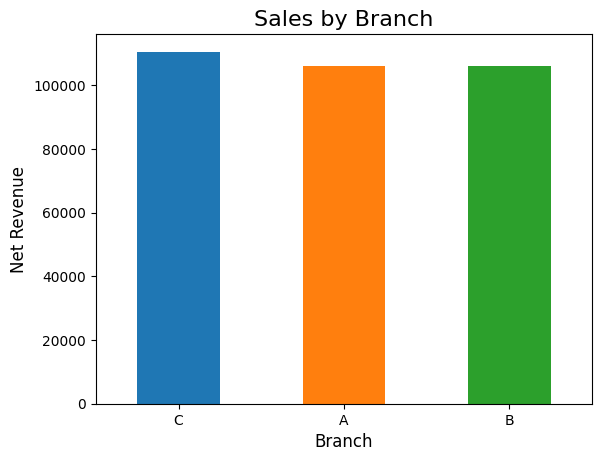

In [49]:
branch_sales.plot(kind="bar", color=["#1f77b4", "#ff7f0e", "#2ca02c"])
plt.title("Sales by Branch", fontsize=16)
plt.xlabel("Branch", fontsize=12)
plt.ylabel("Net Revenue", fontsize=12)
plt.xticks(rotation=0)
plt.show()

<ipython-input-33-56734b143652>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=branch_performance.index, y=branch_performance['Avg Gross Income'], palette='magma')


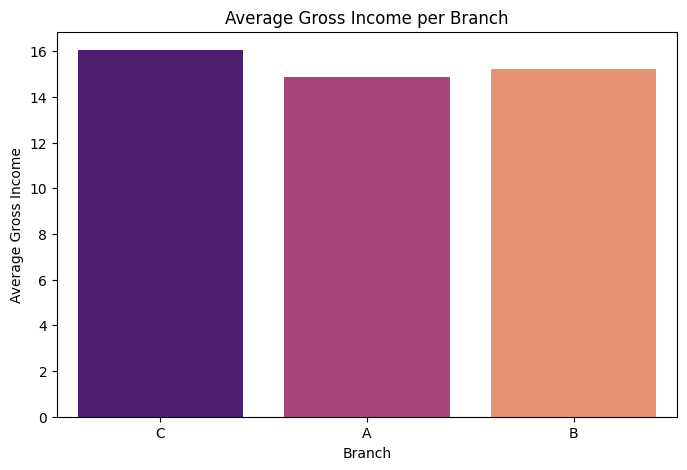

In [ ]:
# Plot average gross income per branch
plt.figure(figsize=(8, 5))
sns.barplot(x=branch_performance.index, y=branch_performance['Avg Gross Income'], palette='magma')
plt.title('Average Gross Income per Branch')
plt.ylabel('Average Gross Income')
plt.xlabel('Branch')
plt.show()

## Analyze customer satisfaction

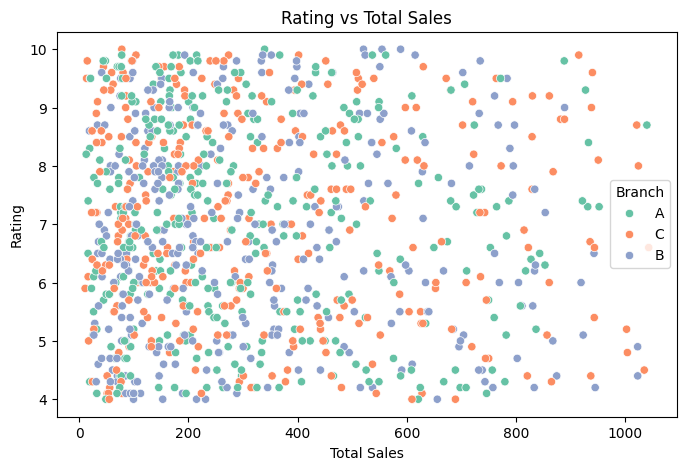

In [ ]:
# Scatter plot of Rating vs Total Sales
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Total', y='Rating', hue='Branch', palette='Set2')
plt.title('Rating vs Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Rating')
plt.legend(title='Branch')
plt.show()

<ipython-input-38-679f407f8a28>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_ratings.index, y=product_ratings.values, palette='coolwarm')


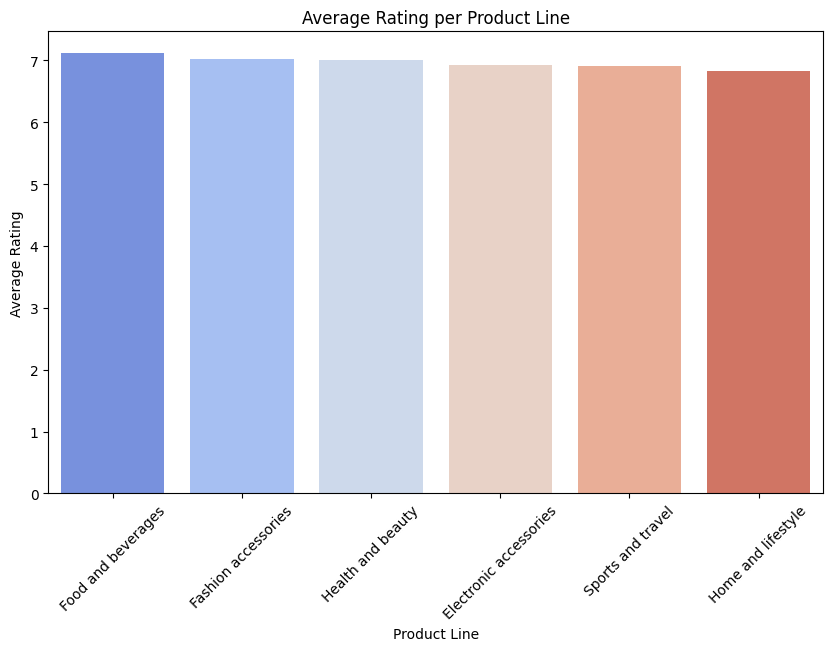

In [ ]:
# Visualizing average ratings per product line
plt.figure(figsize=(10, 6))
sns.barplot(x=product_ratings.index, y=product_ratings.values, palette='coolwarm')
plt.title('Average Rating per Product Line')
plt.ylabel('Average Rating')
plt.xlabel('Product Line')
plt.xticks(rotation=45)
plt.show()